In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import os


path = os.getcwd() + '/Stats19_Data_2005-2014/Accidents0514.csv'
accidents = pd.read_csv(path, low_memory = False)

In [9]:
list(accidents)

['Accident_Index',
 'Location_Easting_OSGR',
 'Location_Northing_OSGR',
 'Longitude',
 'Latitude',
 'Police_Force',
 'Accident_Severity',
 'Number_of_Vehicles',
 'Number_of_Casualties',
 'Date',
 'Day_of_Week',
 'Time',
 'Local_Authority_(District)',
 'Local_Authority_(Highway)',
 '1st_Road_Class',
 '1st_Road_Number',
 'Road_Type',
 'Speed_limit',
 'Junction_Detail',
 'Junction_Control',
 '2nd_Road_Class',
 '2nd_Road_Number',
 'Pedestrian_Crossing-Human_Control',
 'Pedestrian_Crossing-Physical_Facilities',
 'Light_Conditions',
 'Weather_Conditions',
 'Road_Surface_Conditions',
 'Special_Conditions_at_Site',
 'Carriageway_Hazards',
 'Urban_or_Rural_Area',
 'Did_Police_Officer_Attend_Scene_of_Accident',
 'LSOA_of_Accident_Location']

In [17]:
accidents_urban = accidents[accidents['Urban_or_Rural_Area'] == 1]
print('Fraction of accidents in urban areas = {0}'.format(accidents_urban.shape[0]/accidents.shape[0]))

Fraction of accidents in urban areas = 0.6426569108684217


In [24]:
accidents['Date'] = pd.to_datetime(accidents['Date'])

In [28]:
accidents_by_year = accidents.groupby(accidents['Date'].map(lambda x: x.year))

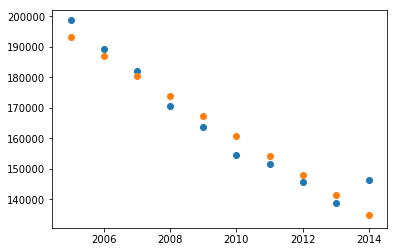

-6511.72727273


In [123]:
year = np.asarray(accidents_by_year.size().axes)[0].reshape(-1,1)
accidents = accidents_by_year.size().values
regr = linear_model.LinearRegression()
regr.fit(year,accidents)
plt.scatter(year, accidents)
plt.scatter(year,regr.predict(year))
plt.show()
print(regr.coef_[0])